In [103]:
import matplotlib
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import spearmanr
matplotlib.rcParams['figure.figsize']=(5,5)

Documentation

1. finding missing values in the dataset

2. some values of diameter was missing.so removed those rows from dataset

3. Some of the parameters were missing most of the values(more than 90%) so removing those parameters as they will not be providing sufficient information about the diameter.

4. Changing the datatype of diameter from Object to Float.

5. Plotting graphs to understant the distribution of data points.

In [104]:
asteroid=pd.read_csv("/content/drive/MyDrive/Asteroid_Updated.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,10,15,16,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [105]:
asteroid.shape

(839714, 31)

In [106]:
asteroid.head()

,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,...,0.426,NaN,C,G,0.12,1.59478,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,...,0.284,NaN,B,B,0.11,1.23324,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,...,0.433,NaN,Sk,S,0.32,1.03454,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,...,0.492,NaN,V,V,0.32,1.13948,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,...,0.411,NaN,S,S,NaN,1.09589,MBA,0.238632,1508.600458,282.366289


In [107]:
asteroid['class'].value_counts()

MBA    747420
OMB     24715
IMB     17552
MCA     17354
APO     11759
AMO      8020
TJN      7385
TNO      3310
ATE      1601
CEN       488
AST        84
IEO        20
HYA         4
PAA         2
Name: class, dtype: int64

In [108]:
print("columns in asteroid",list(asteroid.columns))

columns in asteroid ['name', 'a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc', 'condition_code', 'n_obs_used', 'H', 'neo', 'pha', 'diameter', 'extent', 'albedo', 'rot_per', 'GM', 'BV', 'UB', 'IR', 'spec_B', 'spec_T', 'G', 'moid', 'class', 'n', 'per', 'ma']


info regarding columns


*   name=Name of asteroid
*   a= semi major axis
*   e-eccentricity
*   i- inclination with respect to x-y elliptical plane
*   om - longitude of the ascending node
*   w- argument of perihelion
*   q - perihelion distance
*   ad - aphelion distance
*   per_y - orbital period
*   data_Arc - data arc span(d)
*   condition_Code = orbit condition code
*   n_obs_used - number of observation used
*   H - absolute magnitude parameter
*   neo-Near earth object
*   pha - Physically hazardous object
*   diameter - diameter of asteroids
*   extent - Object bi/tri axial ellipsoid dimensions(Km)
*   albedo - geometric albedo
*   rot_per - rotation period



In [109]:
#finding missing values in dataset
asteroid.isnull().sum()

name              817747
a                      2
e                      0
i                      0
om                     0
w                      0
q                      0
ad                     6
per_y                  1
data_arc           15474
condition_code       867
n_obs_used             0
H                   2689
neo                    6
pha                16442
diameter          702078
extent            839696
albedo            703305
rot_per           820918
GM                839700
BV                838693
UB                838735
IR                839713
spec_B            838048
spec_T            838734
G                 839595
moid               16442
class                  0
n                      2
per                    6
ma                     8
dtype: int64

In [110]:
#looking at missing values of diameter
asteroid[asteroid['diameter'].isnull()].head()

,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
681,Hagar,2.654040,0.171983,11.505647,190.799959,104.993824,2.197591,3.110489,4.323837,40313.0,...,NaN,NaN,NaN,NaN,NaN,1.215450,MBA,0.227952,1579.281370,134.457728
698,Hela,2.610998,0.410284,15.299180,242.551766,91.399514,1.539746,3.682249,4.219081,42540.0,...,0.386,NaN,Sq,S,NaN,0.624487,MCA,0.233612,1541.019467,237.586385
718,Albert,2.638780,0.546301,11.564845,183.887287,156.163668,1.197212,4.080348,4.286601,39478.0,...,NaN,NaN,S,NaN,NaN,0.203359,AMO,0.229932,1565.680891,48.317252
729,Athanasia,2.243362,0.177505,4.234895,95.073806,123.549777,1.845154,2.641570,3.360139,39112.0,...,NaN,NaN,NaN,NaN,NaN,0.841461,MBA,0.293329,1227.290668,295.120065
842,Nicolaia,2.279598,0.209766,7.997715,4.071354,316.957209,1.801415,2.757780,3.441878,37651.0,...,NaN,NaN,NaN,NaN,NaN,0.798230,MBA,0.286363,1257.146084,317.982712


In [111]:
#removing those columns which have missing values of diameter
asteroid=asteroid.dropna(subset=['diameter'])

In [112]:
asteroid.shape

(137636, 31)

In [113]:
asteroid.isnull().sum()

name              122512
a                      0
e                      0
i                      0
om                     0
w                      0
q                      0
ad                     0
per_y                  0
data_arc             138
condition_code         0
n_obs_used             0
H                    747
neo                    0
pha                    0
diameter               0
extent            137620
albedo              1230
rot_per           126448
GM                137622
BV                136631
UB                136671
IR                137635
spec_B            136266
spec_T            136671
G                 137517
moid                   0
class                  0
n                      0
per                    0
ma                     0
dtype: int64

In [114]:
#removing those variable which have a lot of missing values
asteroid=asteroid.drop('name',axis=1)
asteroid=asteroid.drop('extent',axis=1)
asteroid=asteroid.drop('GM',axis=1)
asteroid=asteroid.drop('BV',axis=1)
asteroid=asteroid.drop('UB',axis=1)
asteroid=asteroid.drop('IR',axis=1)
asteroid=asteroid.drop('spec_B',axis=1)
asteroid=asteroid.drop('spec_T',axis=1)
asteroid=asteroid.drop('G',axis=1)
asteroid=asteroid.drop('rot_per',axis=1)

In [115]:
asteroid.isnull().sum()

a                    0
e                    0
i                    0
om                   0
w                    0
q                    0
ad                   0
per_y                0
data_arc           138
condition_code       0
n_obs_used           0
H                  747
neo                  0
pha                  0
diameter             0
albedo            1230
moid                 0
class                0
n                    0
per                  0
ma                   0
dtype: int64

In [116]:
asteroid.dtypes

a                 float64
e                 float64
i                 float64
om                float64
w                 float64
q                 float64
ad                float64
per_y             float64
data_arc          float64
condition_code     object
n_obs_used          int64
H                 float64
neo                object
pha                object
diameter           object
albedo            float64
moid              float64
class              object
n                 float64
per               float64
ma                float64
dtype: object

In [117]:
asteroid['diameter']=asteroid['diameter'].astype(float)
asteroid['a']=asteroid['a'].astype(float)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8a9b83fa90>,
      dtype=object)

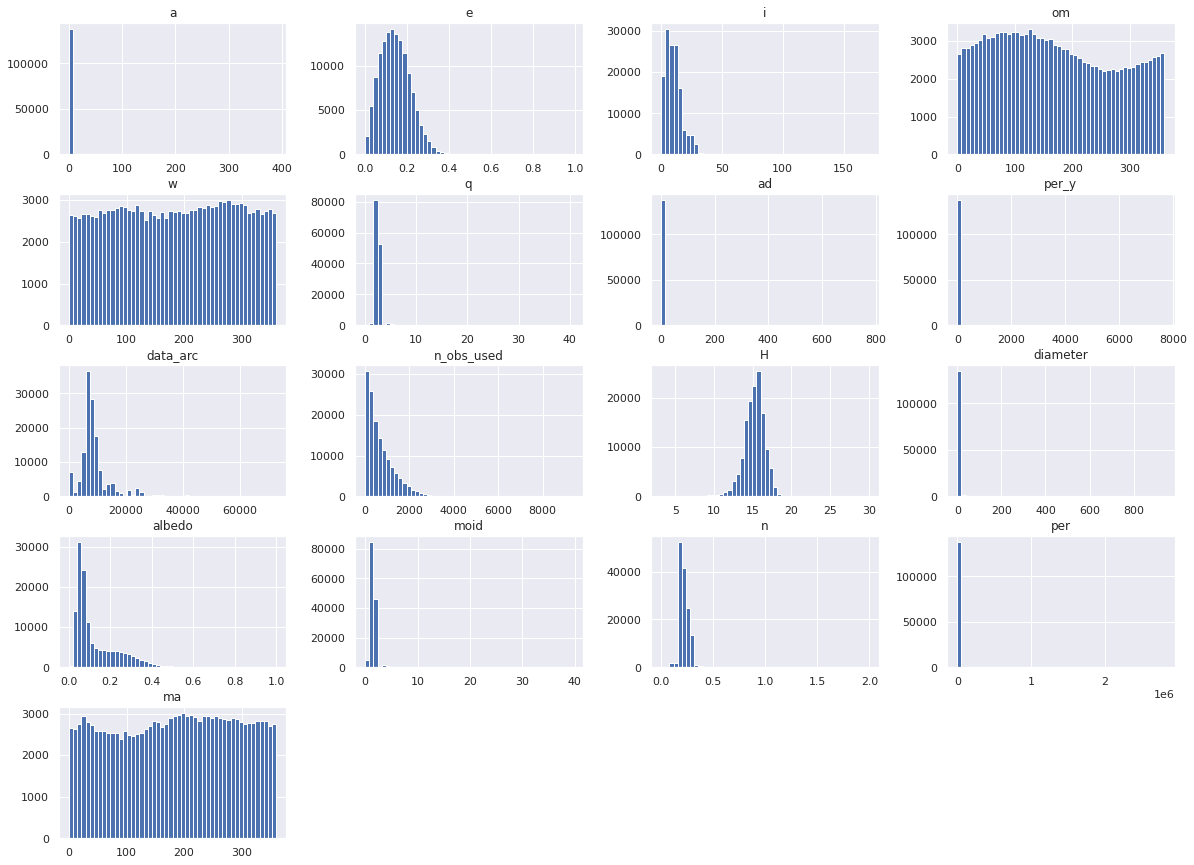

In [94]:
asteroid.hist(bins=50, figsize=(20 ,15))

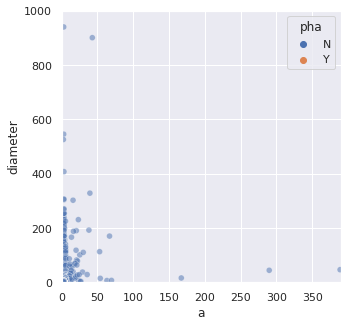

In [95]:
sns.scatterplot(data=asteroid,x='a',y='diameter',hue='pha',alpha=0.5)
plt.xlim([0,390])
plt.ylim([0,1000])
plt.show();

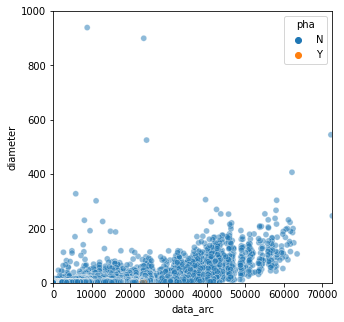

In [18]:
sns.scatterplot(data=asteroid,x='data_arc',y='diameter',hue='pha',alpha=0.5)
plt.xlim([0,72684])
plt.ylim([0,1000])
plt.show();

In [19]:
max(asteroid['albedo'])

1.0

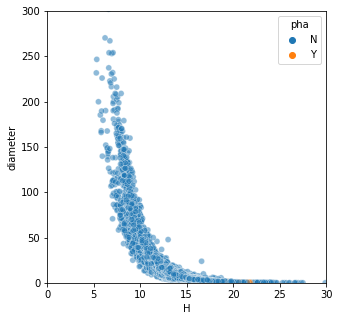

In [20]:
sns.scatterplot(data=asteroid,x='H',y='diameter',hue='pha',alpha=0.5)
plt.xlim([0,30])
plt.ylim([0,300])
plt.show();

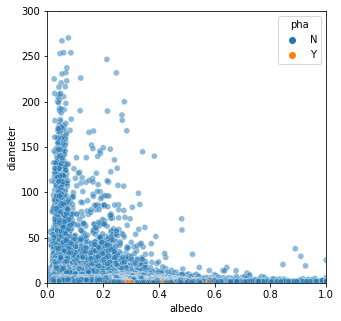

In [21]:
sns.scatterplot(data=asteroid,x='albedo',y='diameter',hue='pha',alpha=0.5)
plt.xlim([0,1])
plt.ylim([0,300])
plt.show();

In [51]:
asteroid['class'].value_counts()

MBA    126390
OMB      7510
TJN      1874
IMB       588
APO       486
MCA       355
AMO       269
ATE        95
CEN        49
TNO        13
AST         7
Name: class, dtype: int64

In [52]:
asteroid.isnull().sum()

a                    0
e                    0
i                    0
om                   0
w                    0
q                    0
ad                   0
per_y                0
data_arc           138
condition_code       0
n_obs_used           0
H                  747
neo                  0
pha                  0
diameter             0
albedo            1230
moid                 0
class                0
n                    0
per                  0
ma                   0
dtype: int64

In [53]:
asteroid.shape

(137636, 21)

data_arc=i,n_obs_used,H,diameter,albedo,data_arc (6)

H=e,q,data_arc,n_obs_used,diameter,albedo,moid,n  (8)

albedo=a,q,data_arc,n_obs_used,H,diameter,moid,n  (8)

## **EDA**

In [118]:
cols=['data_arc','H','albedo']

In [119]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=2)
asteroid[cols] = impute_knn.fit_transform(asteroid[cols])

In [120]:
asteroid.isna().sum()

a                 0
e                 0
i                 0
om                0
w                 0
q                 0
ad                0
per_y             0
data_arc          0
condition_code    0
n_obs_used        0
H                 0
neo               0
pha               0
diameter          0
albedo            0
moid              0
class             0
n                 0
per               0
ma                0
dtype: int64

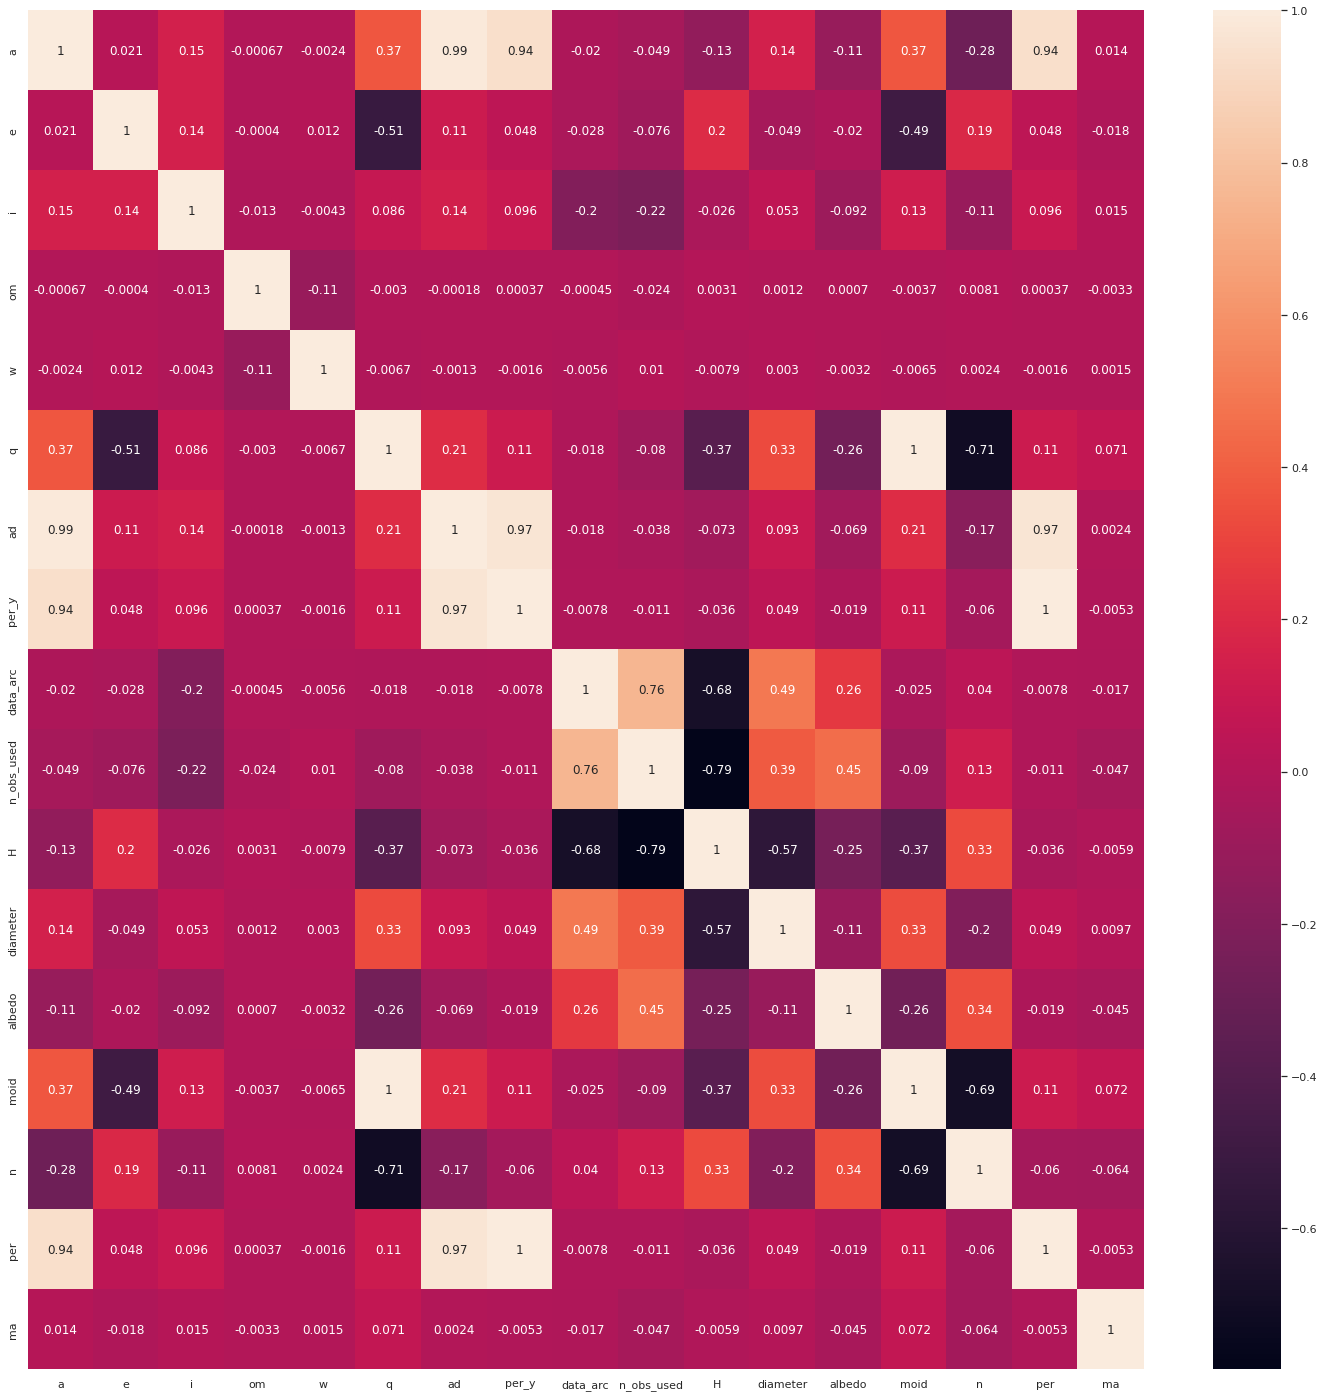

In [121]:
sns.set(rc = {'figure.figsize':(25,25)})
sns.heatmap(asteroid.select_dtypes(['float64' , 'int64']).corr(),annot=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


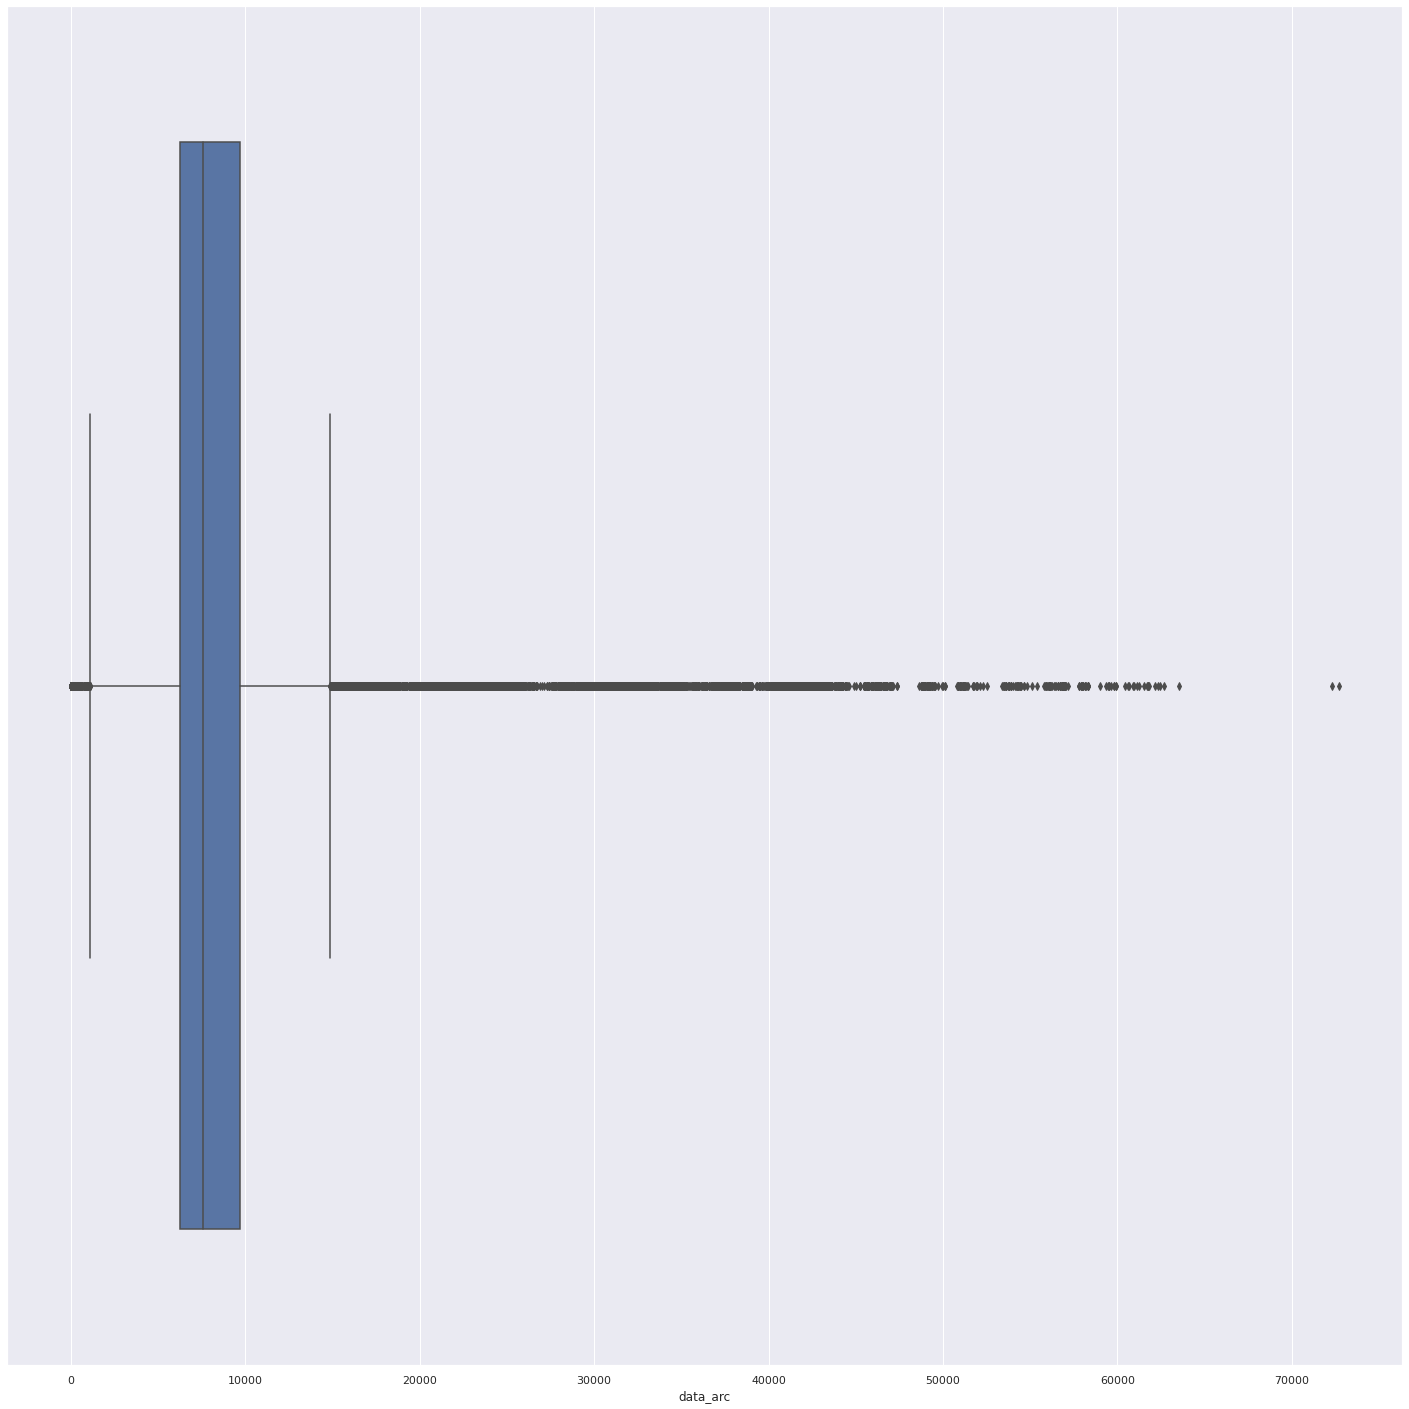

In [122]:
sns.boxplot(asteroid['data_arc'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


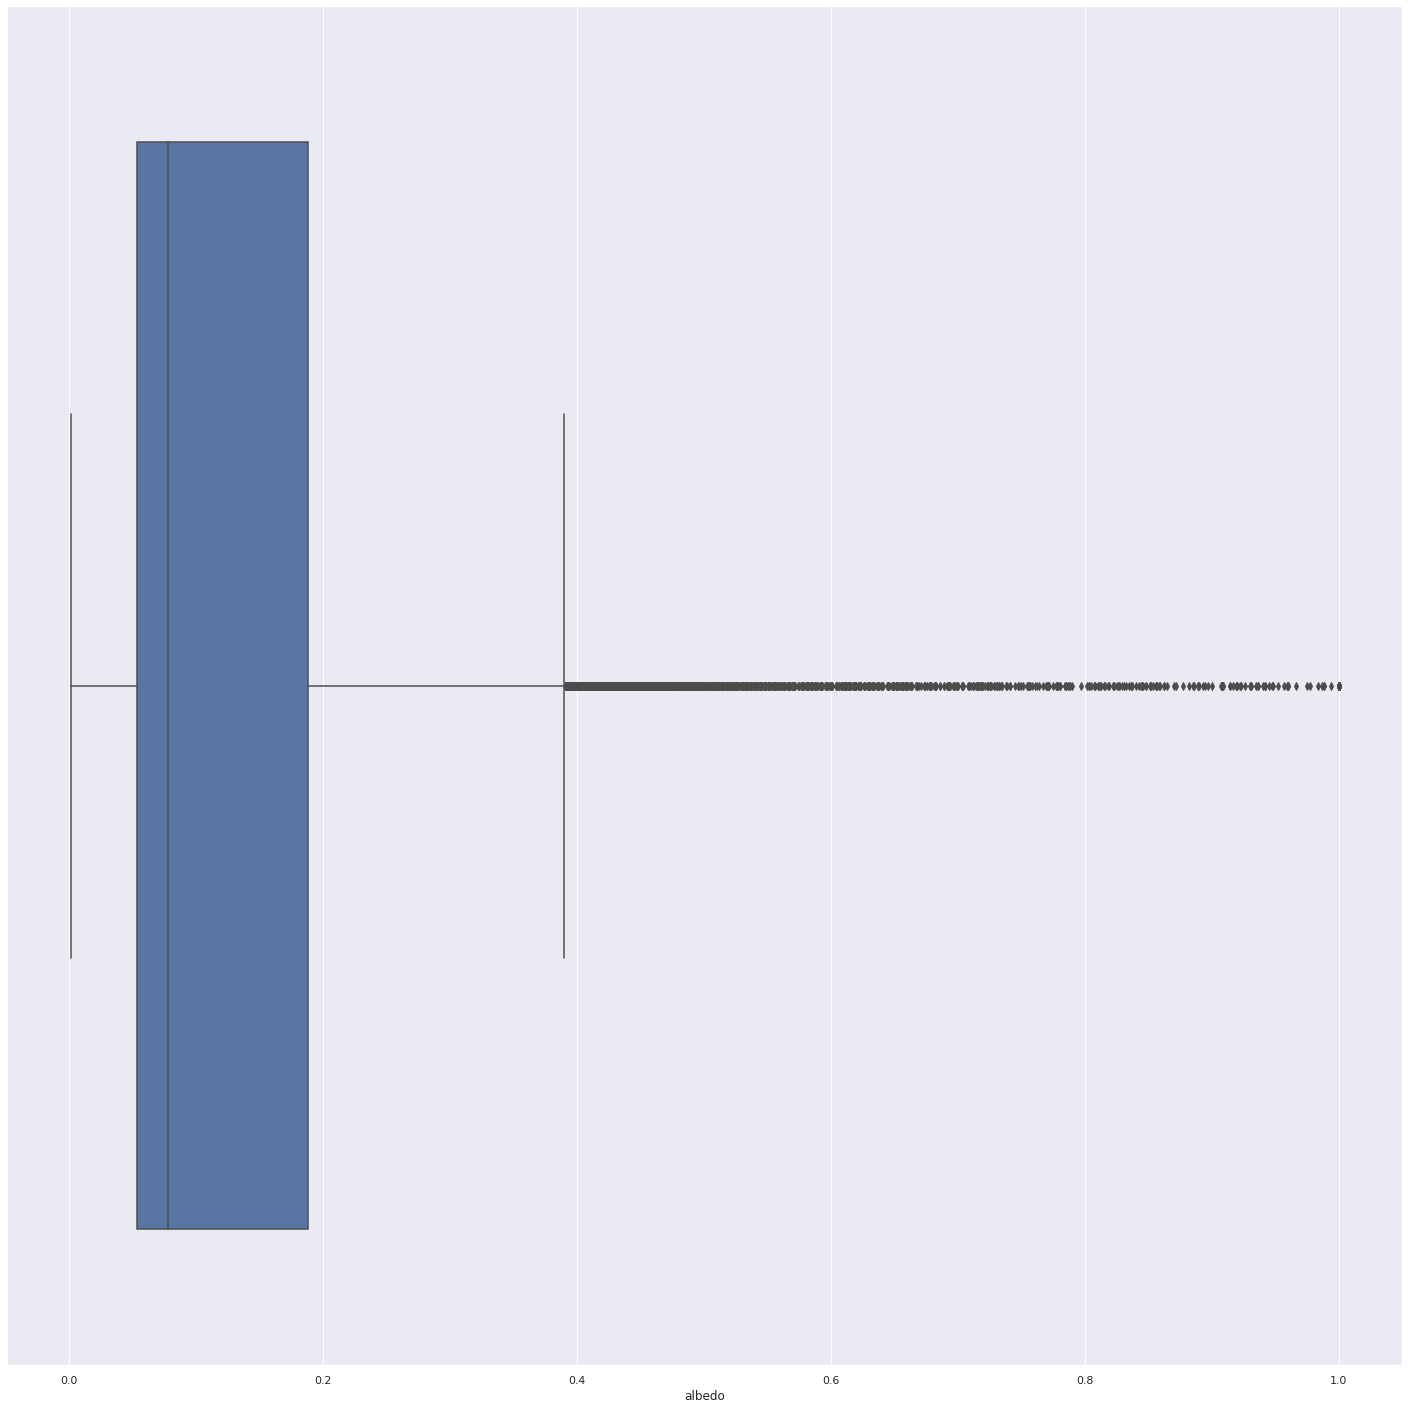

In [57]:
sns.boxplot(asteroid['albedo'])

In [123]:
#finding corelation of different variables with Diameter 
for i in asteroid.select_dtypes(['float64' , 'int64']):
   coef, p = spearmanr(asteroid[i], asteroid['diameter'])
   print("corelation of ",i,'=',coef)

corelation of  a = 0.5701489865858509
corelation of  e = -0.14813765496168466
corelation of  i = 0.132370681553146
corelation of  om = 0.0014940115733321705
corelation of  w = 0.005160507891247732
corelation of  q = 0.5246860997056233
corelation of  ad = 0.48296879972181944
corelation of  per_y = 0.5701489865858509
corelation of  data_arc = 0.3737867581306729
corelation of  n_obs_used = 0.42924001030778874
corelation of  H = -0.7453869601570504
corelation of  diameter = 0.9999999999999998
corelation of  albedo = -0.26398471454876526
corelation of  moid = 0.5292709954026358
corelation of  n = -0.5701489865858509
corelation of  per = 0.5701489865858509
corelation of  ma = 0.03229989195106305


In [124]:
#combining low corelation features together in ration of their corelation so on reducing dimension all info from those is not lost
asteroid['neg']=0.14*asteroid['e']+0.26*asteroid['albedo']
asteroid['pos']=0.13*asteroid['i']+0.0014*asteroid['om']+0.005*asteroid['w']+0.032*asteroid['ma']+0.37*asteroid['data_arc']
asteroid.drop(['e','albedo'],axis=1,inplace=True)
asteroid.drop(['i','om','w','ma','data_arc'],axis=1,inplace=True)

In [125]:
#finding corelation of different variables with Diameter 
for i in asteroid.select_dtypes(['float64' , 'int64']):
   coef, p = spearmanr(asteroid[i], asteroid['diameter'])
   print("corelation of ",i,'=',coef)

corelation of  a = 0.5701489865858509
corelation of  q = 0.5246860997056233
corelation of  ad = 0.48296879972181944
corelation of  per_y = 0.5701489865858509
corelation of  n_obs_used = 0.42924001030778874
corelation of  H = -0.7453869601570504
corelation of  diameter = 0.9999999999999998
corelation of  moid = 0.5292709954026358
corelation of  n = -0.5701489865858509
corelation of  per = 0.5701489865858509
corelation of  neg = -0.3179824515491928
corelation of  pos = 0.37438818546307046


In [126]:
asteroid["neo"]=asteroid["neo"].replace({'Y':1,'N':0})
asteroid["pha"]=asteroid["pha"].replace({'Y':1,'N':0})


# **Predicting values**

# **PREDICTING VALUES USING DL**

In [133]:
from keras.models import Sequential
from keras.layers import Dense

In [159]:
asteroid.shape

(137636, 16)

Define network for prediction

In [226]:
 model = Sequential([
	Dense(14, input_shape=(14,), kernel_initializer='normal', activation='relu'),
	Dense(6, kernel_initializer='normal', activation='relu'),
	Dense(1, kernel_initializer='normal')
   ])

In [227]:
 model.compile(loss='mean_squared_error', optimizer='adam')


In [213]:
arc_data =asteroid.drop(['diameter','class'],axis=1)

In [214]:
arc_data_y=asteroid['diameter']

In [215]:
arc_data=arc_data.dropna()

In [216]:
arc_data_y=arc_data_y.dropna()

In [217]:
from sklearn import preprocessing

In [218]:
min_max_scaler = preprocessing.MinMaxScaler()
arc_scale = min_max_scaler.fit_transform(arc_data)

In [219]:
arc_data.isna().sum()

a                 0
q                 0
ad                0
per_y             0
condition_code    0
n_obs_used        0
H                 0
neo               0
pha               0
moid              0
n                 0
per               0
neg               0
pos               0
dtype: int64

In [220]:
from sklearn.model_selection import train_test_split

In [221]:
arc_train, arc_val_and_test, arc_y_train, arc_y_val_and_test = train_test_split(arc_scale, arc_data_y, test_size=0.3)

In [222]:
arc_val, arc_test, arc_y_val, arc_y_test = train_test_split(arc_val_and_test, arc_y_val_and_test, test_size=0.5)

In [230]:

hist = model.fit(arc_train, arc_y_train,
          batch_size=34, epochs=10,
          validation_data=(arc_val, arc_y_val))

Epoch 1/10
2834/2834 [==============================] - 8s 3ms/step - loss: 14.3708 - val_loss: 13.3511
Epoch 2/10
2834/2834 [==============================] - 10s 3ms/step - loss: 13.7848 - val_loss: 12.5118
Epoch 3/10
2834/2834 [==============================] - 8s 3ms/step - loss: 13.3354 - val_loss: 11.5417
Epoch 4/10
2834/2834 [==============================] - 8s 3ms/step - loss: 12.9271 - val_loss: 10.8203
Epoch 5/10
2834/2834 [==============================] - 7s 3ms/step - loss: 12.4958 - val_loss: 10.6642
Epoch 6/10
2834/2834 [==============================] - 8s 3ms/step - loss: 12.1591 - val_loss: 9.6102
Epoch 7/10
2834/2834 [==============================] - 9s 3ms/step - loss: 11.7833 - val_loss: 9.5307
Epoch 8/10
2834/2834 [==============================] - 8s 3ms/step - loss: 11.4416 - val_loss: 8.8758
Epoch 9/10
2834/2834 [==============================] - 7s 3ms/step - loss: 11.0988 - val_loss: 8.4055
Epoch 10/10
2834/2834 [==============================] - 7s 3ms/ste

In [231]:
model.evaluate(arc_test, arc_y_test)

646/646 [==============================] - 1s 2ms/step - loss: 3.7086


3.708566904067993